In [1]:
# Program to perform image classification based on facial recognition
# Importing the necessary libraries for the program
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the images from the given data 
# The images are stored in the Dataset_Question1 Directory
pwd = os.getcwd()
data_wd = pwd+"/Dataset_Question1/"
batch_size = 10   # Represents how many images of a particular person is there -- Referred to as batch
total_people = 15 # Total number of people present to perform the classification 
total_images = batch_size*total_people # Total number of images available
d1 = 64 # Dimensions of the images are given by d1 and d2
d2 = 64
F = np.zeros((d1, d2, total_images)) # Storing all the images in the variable F 
for batch in range(total_people):
    # All the images are loaded using glob and plt.imread and the data is stored in variable F 
    os.chdir(data_wd+str(batch+1))
    names = sorted(glob.glob("*.pgm"))
    names = sorted(names,key=lambda x: int(os.path.splitext(x)[0]))
    d1, d2 = plt.imread(names[0]).shape
    num = len(names)
    for n, i in enumerate(names):
        F[:, :, batch*batch_size+n] = (plt.imread(i,0).astype(np.double)) / 255.
    os.chdir(pwd)
# The variable is reshaped so that an image is represented as a column in the matrix F 
F = F.reshape(d1 * d2, batch_size * total_people)
clip = 10
print("The dimensions of the Faces Matrix F = {}".format(F.shape))
os.chdir(pwd)


The dimensions of the Faces Matrix F = (4096, 150)


In [3]:
F_average = np.zeros(d1*d2)
# Calculating the average face matrix and calculating the A matrix which is F - F_AVG 
F_average = np.mean(F,axis=1)
A = np.zeros((d1*d2,total_images))
for i in range(total_images):
    A[:,i] = F[:,i] -F_average[:] 

In [4]:
# Performing SVD on the A matrix and the basis faces are obtained 
u, s, vh = np.linalg.svd(A, full_matrices=True)
U_selected = u

In [5]:
def show_fig(image):
    plt.figure()
    plt.imshow(np.reshape(image,(d1,d2)))

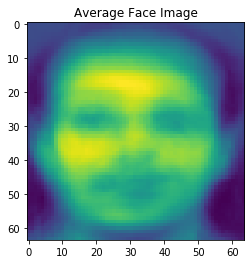

In [6]:
# Having a look at the average face
show_fig(F_average)
plt.title('Average Face Image')
plt.show()

In [7]:
# Selecting all the basis vectors from the U vector and its given by the transpose U obtained from SVD of the A matrix
U_basis = np.transpose(u)

In [8]:
# Selected the representative images from the batch of images 
# The representative image is selected based on the minimum error of norm of dot product of U_Basis and F-F_AVG
err_arr = []
RepresentativeImages = np.zeros((d1*d2,total_people))
for people in range(total_people):
    err_arr = []
    for batch in range(batch_size):
        error = np.linalg.norm(np.dot(U_basis,F[:,batch+people*batch_size]-F_average))
        err_arr.append(error)
    min_error_indx = err_arr.index(min(err_arr))
    RepresentativeImages[:,people] = F[:,min_error_indx + people*batch_size]-F_average

In [9]:
# Calculating the X matrix
X = np.dot(U_basis,RepresentativeImages)

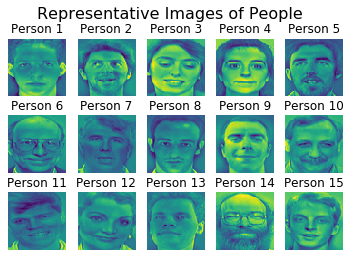

In [10]:
# Representative images of the people
fig, ax = plt.subplots(nrows=3, ncols=5)
fig.suptitle("Representative Images of People",fontsize = 16)
axn = ax.flatten()
PeopleID = 0 
for axes in axn:
    axes.imshow(np.reshape(RepresentativeImages[:,PeopleID],(d1,d2)))
    PeopleID += 1 
    axes.axis('off')
    axes.title.set_text("Person "+str(PeopleID))
plt.show()

In [11]:
# Function to test the face recognition for all the image file name passed as argument
def test_FaceReg(FileName): 
    test_image = (plt.imread(str(FileName)+".pgm",0).astype(np.double)) / 255.
    #show_fig(test_image)
    test_image = np.reshape(test_image,(d1*d2))
    test_x = np.dot(U_basis,test_image-F_average)
    err_arr = []
    for people in range(total_people):
        error = np.linalg.norm(test_x-X[:,people])
        err_arr.append(error)
    Identity = err_arr.index(min(err_arr)) + 1
    #show_fig(RepresentativeImages[:,Identity-1])
    return Identity

In [12]:
Predictions = []
for people in range(total_people):
    os.chdir(data_wd+str(people+1))
    for batch in range(batch_size):
        Predictions.append(test_FaceReg(str(batch+1)))
Predictions = np.asarray(Predictions)

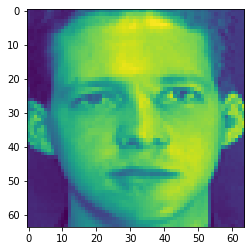

In [13]:
show_fig(F[:,7])

In [14]:
test_image = (F[:,7])
#show_fig(test_image)
test_image = np.reshape(test_image,(d1*d2))
test_x = np.dot(U_basis,test_image-F_average)
err_arr = []
for people in range(total_people):
    error = np.linalg.norm(test_x-X[:,people])
    err_arr.append(error)
Identity = err_arr.index(min(err_arr)) + 1
print(Identity)

1


In [15]:
Result = np.zeros((total_people, batch_size))
for people in range(total_people):
    Result[people,:] = people + 1
Result = np.reshape(Result,(total_images))

In [16]:
Score = np.equal(Predictions,Result)
Score = np.sum(Score)
print("Number of images correctly mapped out of 150 images = {}".format(Score))

Number of images correctly mapped out of 150 images = 117
